In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\priya\Desktop\extra material\amazonrev.csv")
df.head(5)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [5]:
print(df.columns)

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [6]:
print(df.isnull().sum())

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [ ]:
df.drop(columns=[
    'colors', 'dimension', 'ean', 'sizes', 'weight', 'upc',
    'reviews.userCity', 'reviews.userProvince',
    'manufacturer', 'manufacturerNumber',
    'reviews.numHelpful', 'reviews.username',
    'reviews.title'  
], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1597 non-null   object 
 1   asins                1597 non-null   object 
 2   brand                1597 non-null   object 
 3   categories           1597 non-null   object 
 4   dateAdded            1597 non-null   object 
 5   dateUpdated          1597 non-null   object 
 6   keys                 1597 non-null   object 
 7   name                 1597 non-null   object 
 8   prices               1597 non-null   object 
 9   reviews.date         1217 non-null   object 
 10  reviews.doRecommend  539 non-null    object 
 11  reviews.rating       1177 non-null   float64
 12  reviews.sourceURLs   1597 non-null   object 
 13  reviews.text         1597 non-null   object 
dtypes: float64(1), object(13)
memory usage: 174.8+ KB


In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...


True

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
sid = SentimentIntensityAnalyzer()

In [ ]:
df['vader_score'] = df['reviews.text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

In [13]:
def vader_sentiment(score):
    if score <= -0.05:
        return 'Negative'
    elif score >= 0.05:
        return 'Positive'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['vader_score'].apply(vader_sentiment)

C:\Users\priya\AppData\Local\Temp\ipykernel_24236\2448268671.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_sentiment', palette='Set2')


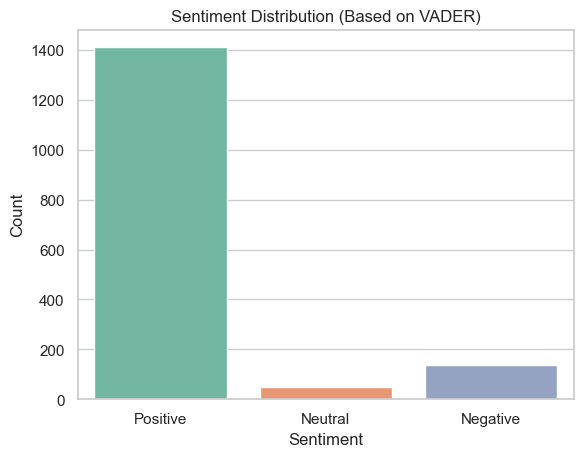

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
sns.countplot(data=df, x='vader_sentiment', palette='Set2')
plt.title("Sentiment Distribution (Based on VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


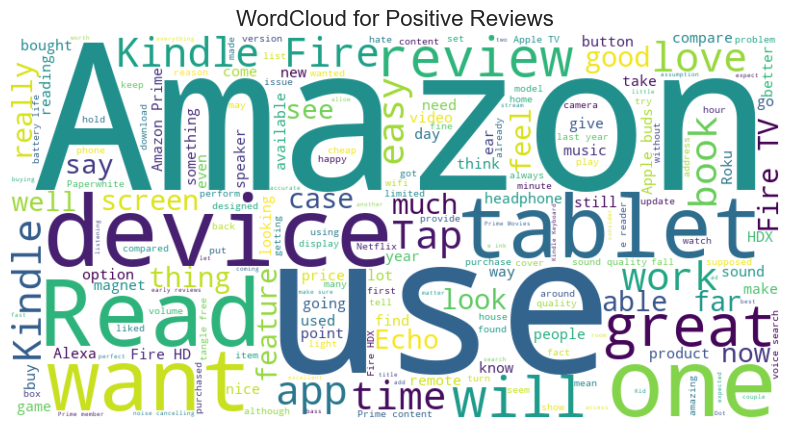

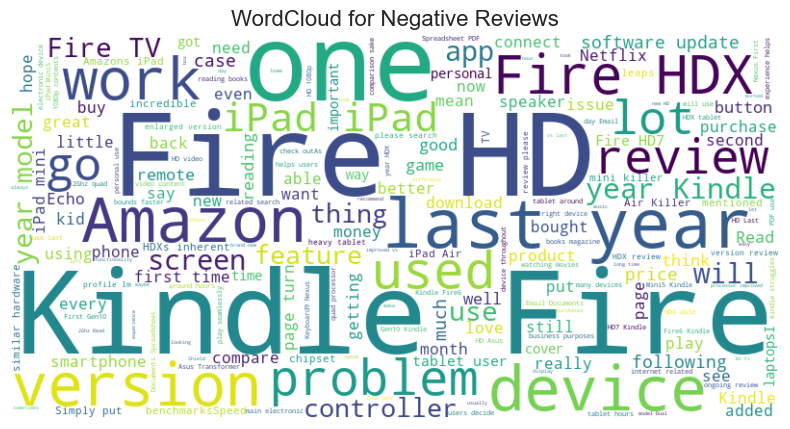

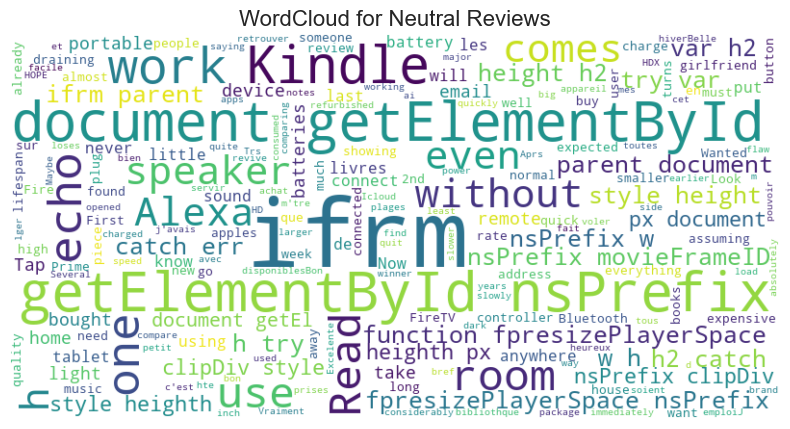

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(sentiment):
    text = " ".join(df[df['vader_sentiment'] == sentiment]['reviews.text'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Reviews", fontsize=16)
    plt.show()


plot_wordcloud('Positive')
plot_wordcloud('Negative')
plot_wordcloud('Neutral')


In [ ]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['rating_sentiment'] = df['reviews.rating'].apply(rating_to_sentiment)


vader_sentiment   Negative  Neutral  Positive
rating_sentiment                             
Negative              46.1      7.9      46.1
Neutral               12.1      3.2      84.7
Positive               6.2      2.8      91.0


In [24]:
comparison = pd.crosstab(df['rating_sentiment'], df['vader_sentiment'], normalize='index') * 100
print(comparison.round(1))

vader_sentiment   Negative  Neutral  Positive
rating_sentiment                             
Negative              46.1      7.9      46.1
Neutral               12.1      3.2      84.7
Positive               6.2      2.8      91.0


In [25]:
from sklearn.model_selection import train_test_split

X = df['reviews.text'].astype(str)
y = df['vader_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.896875

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.21      0.35        33
     Neutral       1.00      0.12      0.22         8
    Positive       0.89      1.00      0.94       279

    accuracy                           0.90       320
   macro avg       0.96      0.45      0.51       320
weighted avg       0.91      0.90      0.86       320



In [ ]:
sample = ["This product was amazing and super comfortable to use!"]
sample_vec = tfidf.transform(sample)
print("Predicted Sentiment:", model.predict(sample_vec)[0])


Predicted Sentiment: Positive
